In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy
import cv2
import matplotlib.pyplot as plt

AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import pathlib
data_dir = "../Anime/"
data_dir = pathlib.Path(data_dir)

In [4]:
image_count=len(list(pathlib.Path(data_dir).glob('*/*.jpg')))
image_count

555056

In [5]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
STEPS_PER_EPOCH

17346.0

In [6]:
# train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),                          
#                                                      batch_size=BATCH_SIZE,
#                                                     shuffle=True,
#                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

In [7]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [8]:
train_gen = list_ds.take(int(image_count*0.95))
test_gen = list_ds.skip(int(image_count*0.95))

In [9]:
def process_path(file_path):
    #   label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img


In [10]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [11]:
train_ds = train_gen.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_gen.map(process_path, num_parallel_calls=AUTOTUNE)

In [12]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [13]:
train_ds = prepare_for_training(train_ds,cache=False)
test_ds  = prepare_for_training(test_ds,cache=False)

In [14]:
def show_batch(image_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.axis('off')

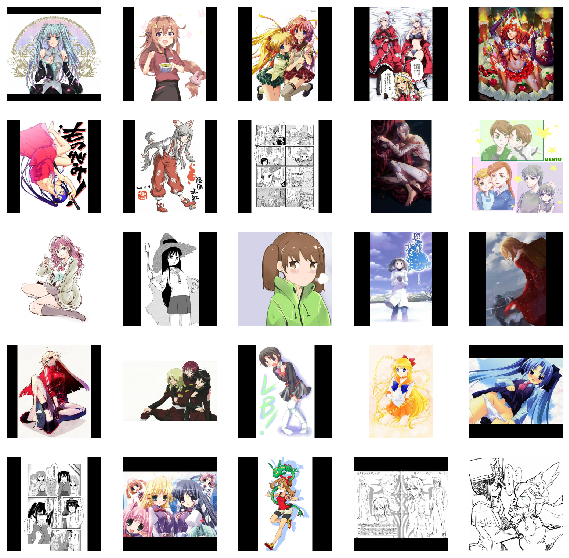

In [15]:
image_batch = next(iter(train_ds))
show_batch(image_batch)

In [16]:
image_batch.shape

TensorShape([32, 256, 256, 3])

In [27]:
from net import DCGAN
from config import Config

In [28]:
def train(restore, dataset):

#     train_dataset = prepare_dataset(Config.tfrecord_dir+'train.tfrecord')
#     dataset = strategy.experimental_distribute_dataset(train_dataset)

    #periodic generation of fake images
    gen_noise = tf.random.normal(shape=[Config.num_gen_imgs, Config.latent_dim], seed=Config.random_seed)
    noise_dataset = tf.data.Dataset.from_tensor_slices(gen_noise).repeat().batch(Config.num_gen_imgs)
#     noise_dataset = strategy.experimental_distribute_dataset(gen_dataset)

    dcgan = DCGAN( restore)
    dcgan.train_loop(Config.num_epochs, dataset, noise_dataset)



In [29]:
train(restore=False, dataset=train_ds)

At Epoch 1
.........................................


ValueError: in converted code:

    /home/jasoni111/Desktop/cvpr/pythonScripts/net.py:218 train_loop  *
        for one_batch in dist_dataset:
    /home/jasoni111/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:665 scan_body
        new_vars = body(iterate, *loop_vars)
    /home/jasoni111/Desktop/cvpr/pythonScripts/net.py:184 train_step  *
        fake_output = self.disc_model(generated_imgs, training=True)
    /home/jasoni111/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py:778 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/jasoni111/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/autograph/impl/api.py:292 wrapper
        return func(*args, **kwargs)
    /home/jasoni111/Desktop/cvpr/pythonScripts/net.py:97 call
        output = self.linear(inputs)
    /home/jasoni111/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py:737 __call__
        self.name)
    /home/jasoni111/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/input_spec.py:213 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_7 is incompatible with the layer: expected axis -1 of input shape to have value 32768 but received input with shape [None, 8192]


In [26]:
for one_batch in train_ds:
    print(one_batch.shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 

KeyboardInterrupt: 